In [40]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'sample_submission.csv', 'test.csv', 'data_description.txt']


In [41]:
#loading the training data
train = pd.read_csv('../input/train.csv')

In [42]:
#properties of the train df
print('Shape of train:',train.shape)
print('columns of train:')
print(train.columns)

Shape of train: (1460, 81)
columns of train:
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', '

In [43]:
#we have 1400 something rows and 80 columns
print('data type of columns:')
train.info()

data type of columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exter

In [44]:
#analyzing sale price
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Min price ins 34900 and max is 755000. There are no null values and seems to be evenly distributed across percentiles

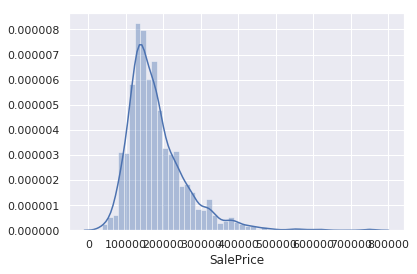

In [45]:
#univariate analysis SalePrice
sns.distplot(train['SalePrice'])

Most of the property rates are in 100000 to 300000 range only

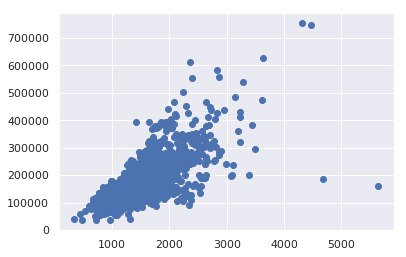

In [46]:
#scatter plot between GrLivArea and sale price
#bivariate analysis
plt.scatter(x='GrLivArea', y='SalePrice', data= train)

There is a linear relationship between GrLivArea and SalePrice

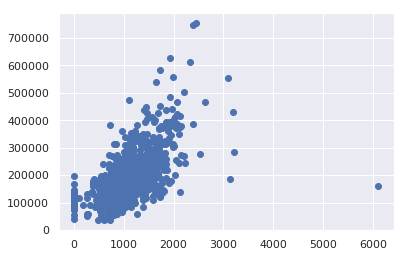

In [47]:
plt.scatter(x='TotalBsmtSF', y='SalePrice', data = train)

<Figure size 432x288 with 0 Axes>

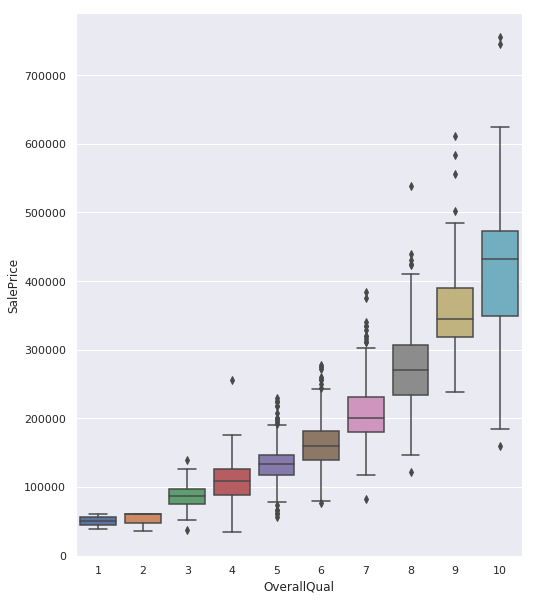

In [48]:
#bivariate analysis categorical data vs sale price
plt.figure(1)
plt.figure(figsize=(8,10))
sns.boxplot(x= 'OverallQual', y='SalePrice', data=train)
plt.show()

<Figure size 432x288 with 0 Axes>

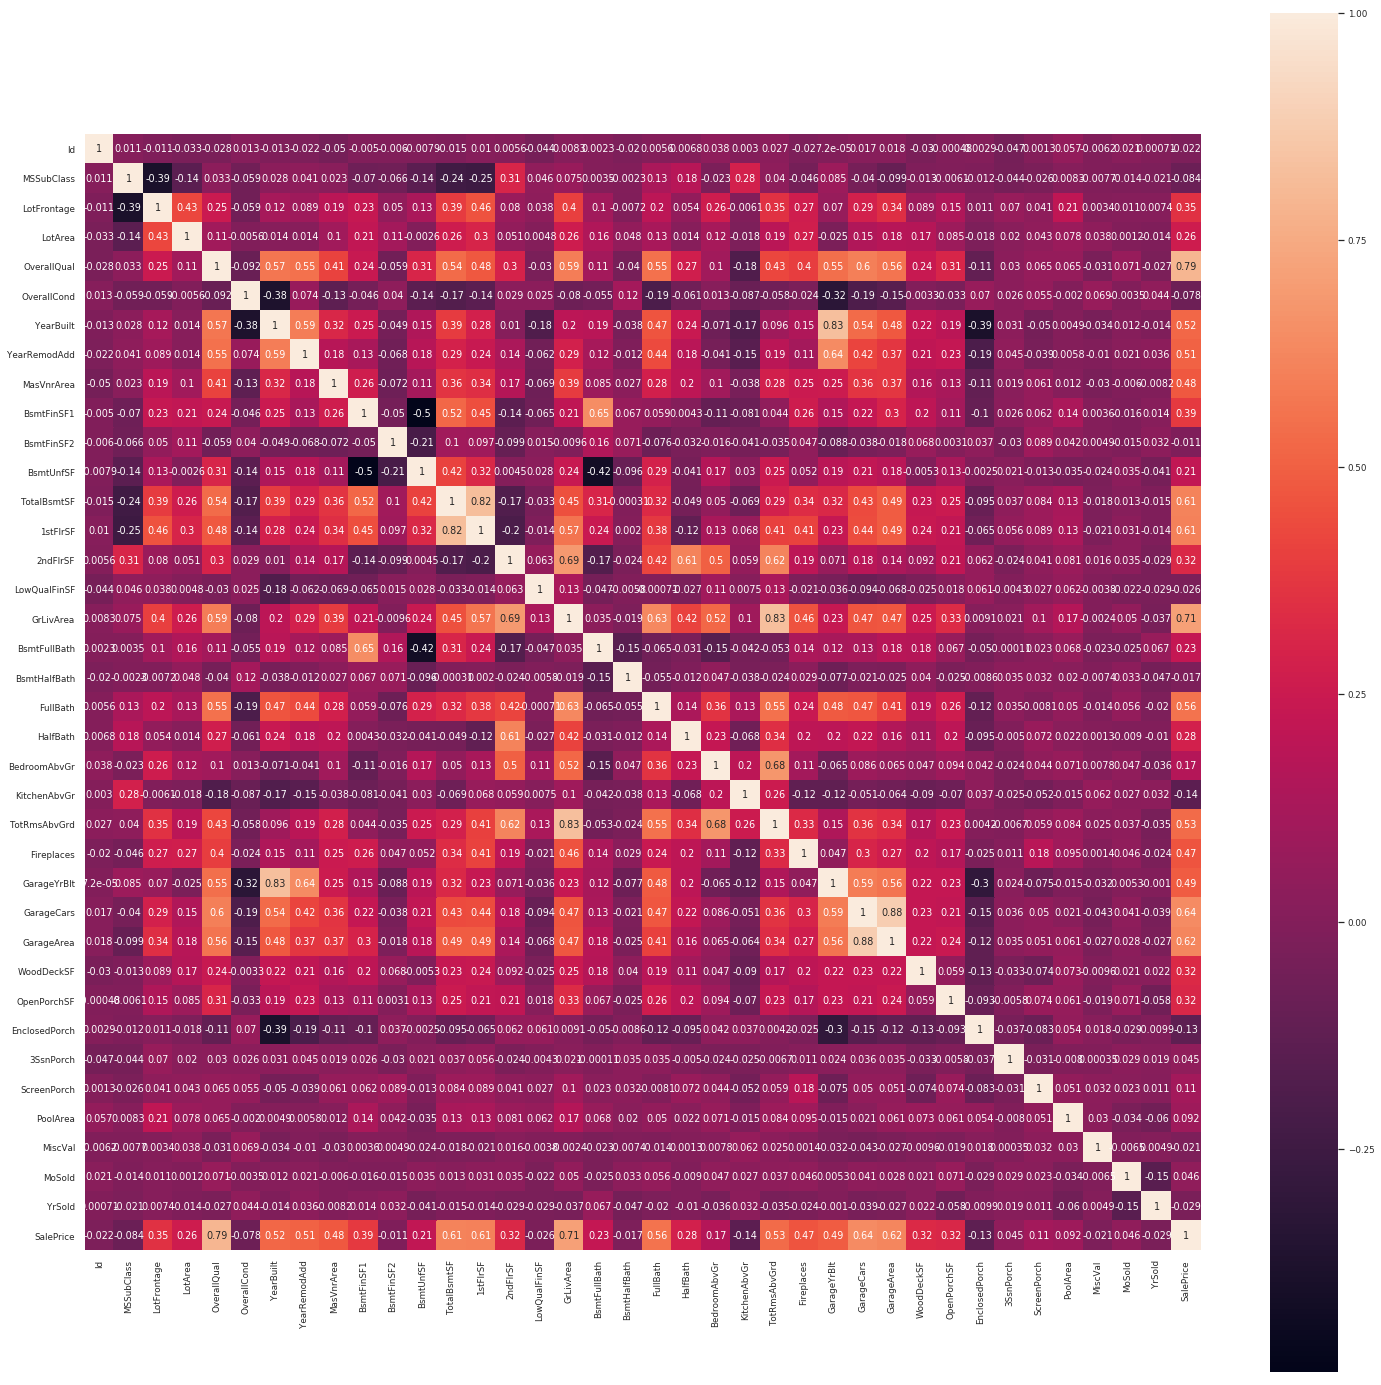

In [49]:
#correlation matrix
plt.figure(2)
plt.figure(figsize = (25,25))
sns.set(font_scale=0.8)
sns.heatmap(train.corr(), vmax=True,square=True, annot = True)

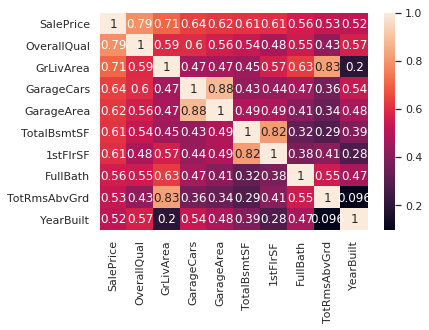

In [50]:
# taking the corr matrix of top 10 variable
k = 10
corrmat = train.corr()
cols = corrmat.nlargest(k,'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale = 1)
hm = sns.heatmap(cm, annot=True,yticklabels=cols.values, xticklabels=cols.values)


In [51]:
print(corrmat.nlargest(k,'SalePrice')['SalePrice'].index)

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')


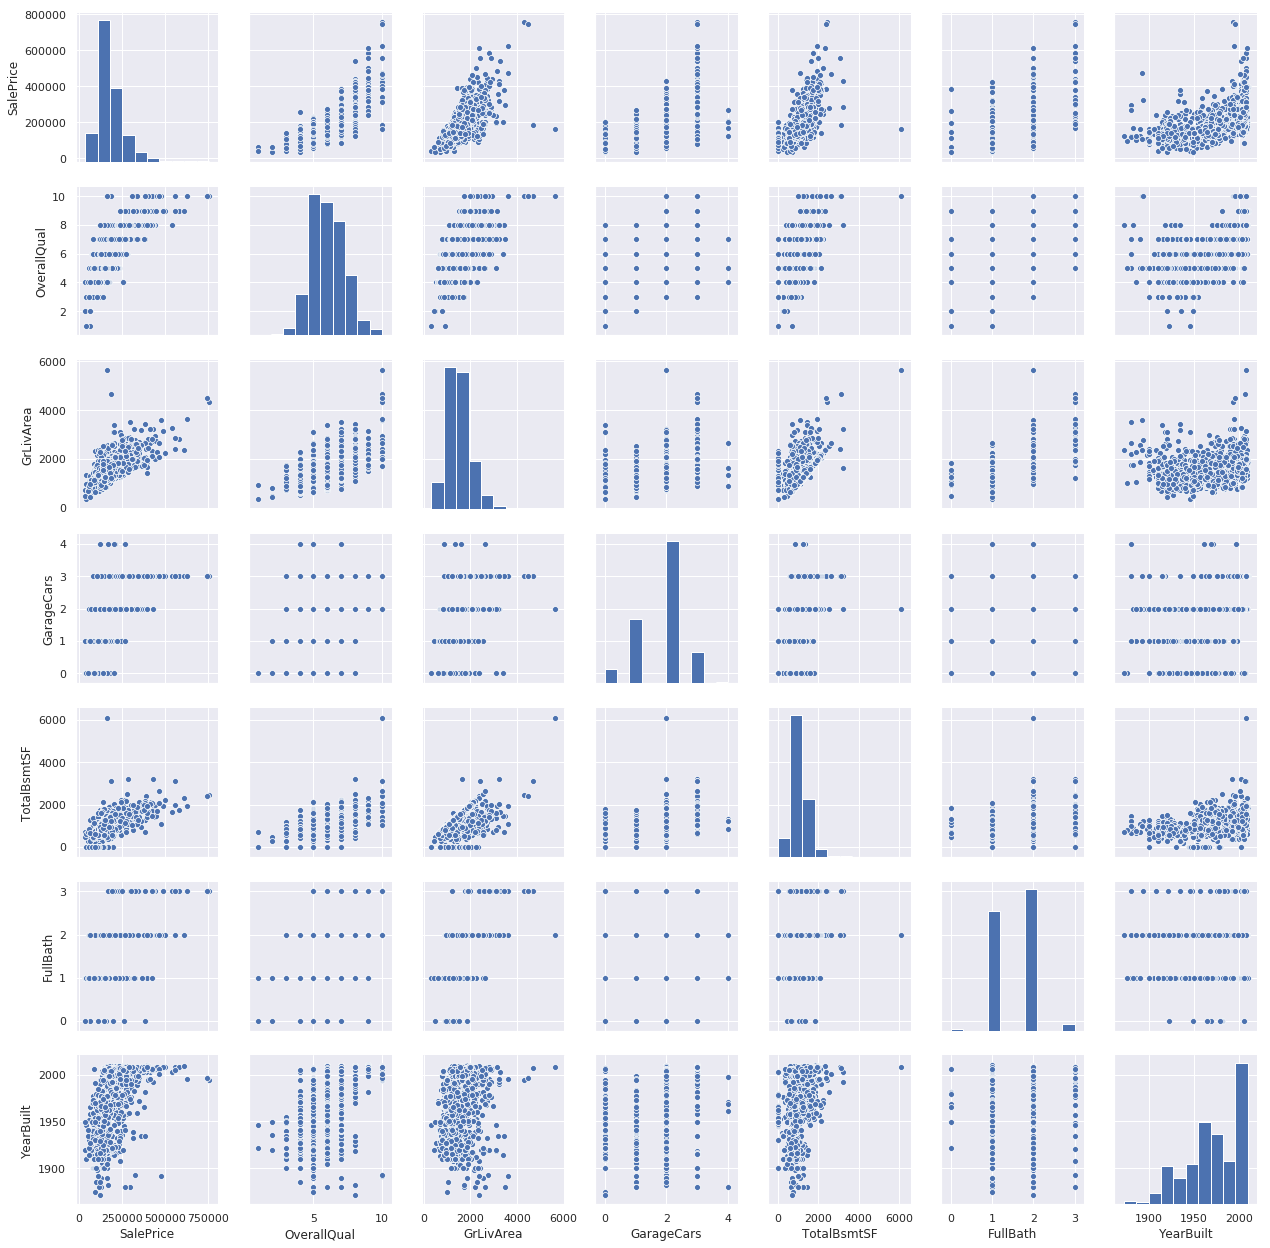

In [52]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size = 2.5)
plt.show();

In [53]:
#missing data
total = train.isnull().sum().sort_values(ascending = False)
percent = round((100*((train.isnull().sum())/(len(train.index)))),2).sort_values(ascending=False)
missing_data = pd.concat([total,percent],axis=1,keys=['total','percent'])
missing_data.head(20)

,total,percent
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageCond,81,5.55
GarageType,81,5.55
GarageYrBlt,81,5.55
GarageFinish,81,5.55


We will remove those columns which have more than 1 null values and delete the row having electrical value as Null

In [54]:
train = train.drop((missing_data.loc[missing_data['total'] > 1]).index,axis=1)
train = train.loc[~train['Electrical'].isnull()]

In [55]:
print(train.shape)
print(train.isnull().sum().max())

(1459, 63)
0


In [56]:
#standardizing the data to handle outliers
from sklearn.preprocessing import StandardScaler
std_SalePrice = StandardScaler().fit_transform(train['SalePrice'][:,np.newaxis])
low_range = std_SalePrice[std_SalePrice[:,0].argsort()][:10]
high_range = std_SalePrice[std_SalePrice[:,0].argsort()][-10:]
print('low range:',low_range)
print('hig range:',high_range)

low range: [[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]
hig range: [[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


(1459,)
(1459,)


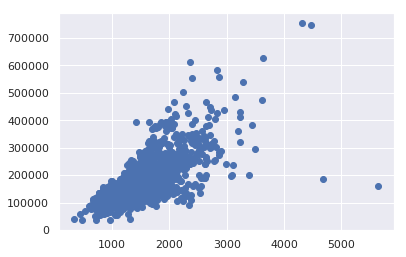

In [57]:
print(train['SalePrice'].shape)
print(train['GrLivArea'].shape)
plt.scatter(x='GrLivArea',y='SalePrice',data=train)

In [58]:
#removing the top two values of 
print((train.sort_values(by = 'GrLivArea', ascending = False)[:2])['Id'])

1298    1299
523      524
Name: Id, dtype: int64


In [59]:
train = train.drop(train[train['Id'] == 1299].index)
train = train.drop(train[train['Id'] == 524].index)


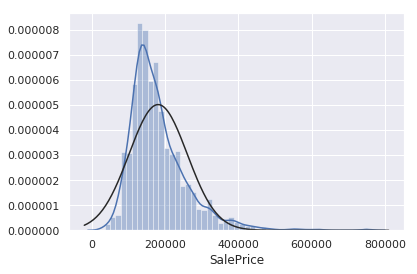

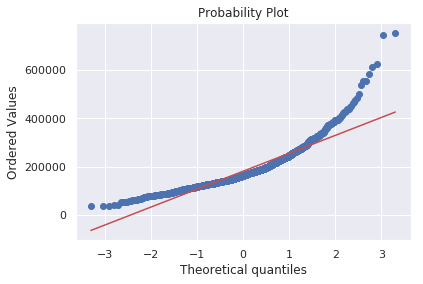

In [60]:
#checking distribution of SalePrice
sns.distplot(train['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot = plt)


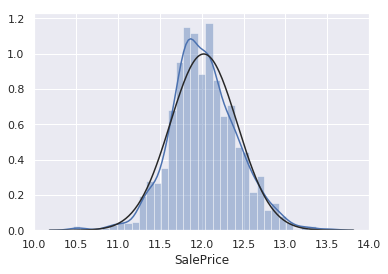

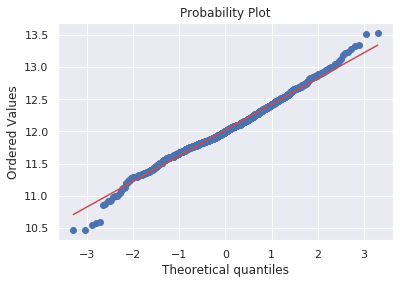

In [61]:
#perform log transformation for SalePrice
train['SalePrice']=np.log(train['SalePrice'])
sns.distplot(train['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot = plt)


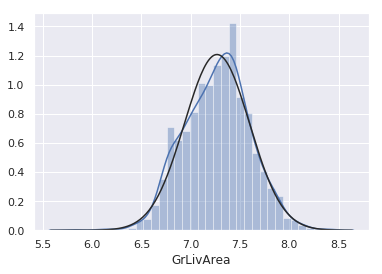

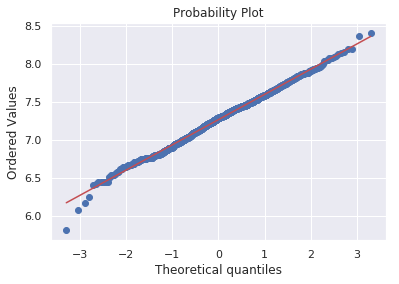

In [62]:
#perform log transformation for SalePrice
train['GrLivArea']=np.log(train['GrLivArea'])
sns.distplot(train['GrLivArea'], fit=norm)
fig = plt.figure()
res = stats.probplot(train['GrLivArea'], plot = plt)

In [63]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

In [64]:
#dropping Id column
train.drop(columns='Id', axis =1 , inplace = True)
print(train.columns)

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')


In [65]:
train['TotalArea'] = train['TotalBsmtSF']+train['1stFlrSF']+train['2ndFlrSF']

In [66]:
obj_cols = (train.select_dtypes(include='object')).columns
print(obj_cols)

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')


In [67]:
train_cat = train.select_dtypes(include='object')
print(train_cat.head())

  MSZoning Street LotShape      ...      PavedDrive SaleType SaleCondition
0       RL   Pave      Reg      ...               Y       WD        Normal
1       RL   Pave      Reg      ...               Y       WD        Normal
2       RL   Pave      IR1      ...               Y       WD        Normal
3       RL   Pave      IR1      ...               Y       WD       Abnorml
4       RL   Pave      IR1      ...               Y       WD        Normal

[5 rows x 28 columns]


In [68]:
#dummy variable creation for categorical values
train_cat = pd.get_dummies(train_cat, drop_first=True)
train_cat.columns

Index(['MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Street_Pave', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg',
       'LandContour_HLS', 'LandContour_Low',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=158)

In [69]:
train_num = train.select_dtypes(exclude='object')
train_num.shape

(1457, 35)

In [70]:
train_fin = pd.concat([train_cat,train_num],axis =1)
train_fin.shape

(1457, 193)

In [101]:
from sklearn.model_selection import train_test_split
X = train_fin.drop(columns='SalePrice',axis=1)
y = train_fin['SalePrice']
print('Shape of X:',X.shape)
print('Shape of y:',y.shape)

Shape of X: (1457, 192)
Shape of y: (1457,)


In [102]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8, random_state=100)

In [103]:
print('Shape of X_train:',X_train.shape)
print('Shape of X_test:',X_test.shape)
print('Shape of y_train:',y_train.shape)
print('Shape of y_test:',y_test.shape)

Shape of X_train: (1165, 192)
Shape of X_test: (292, 192)
Shape of y_train: (1165,)
Shape of y_test: (292,)


In [74]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

print(r2_score(y_test,y_pred))

0.9127488173478776


Linear Regression: r2 score being 91% means, model by default is able to predict 91% of the data with good approximation.
Lets me check the performance of other regrssion models

In [75]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import cross_val_score

In [76]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model,X_train,y_train,scoring='neg_mean_squared_error', cv=5))
    return rmse

In [77]:
#for Ridge regrssion, the hyperparameter is alpha. so we set a list of values for alpha for which the 
# ridge model will be run

# list of alphas to tune
alphas= [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50]

#ridge model


cv_ridge = [rmse_cv(Ridge(alpha=alpha)).mean() for alpha in alphas]

    

Text(0, 0.5, 'rmse')

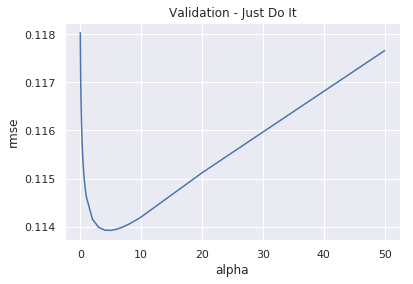

In [78]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [79]:
from sklearn.model_selection import GridSearchCV
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

folds = 5
ridge = Ridge()
model_cv = GridSearchCV(estimator = ridge,
                       cv = folds,
                       param_grid = params,
                       scoring = 'neg_mean_absolute_error',
                       return_train_score = True,
                       verbose =1)

model_cv.fit(X_train,y_train)


Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    3.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [80]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=50]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.038982,0.042701,0.007845,0.004598,0.0001,{'alpha': 0.0001},-0.090432,-0.083320,-0.079304,-0.074102,-0.086418,-0.082715,0.005647,25,-0.060583,-0.063739,-0.063634,-0.065623,-0.062057,-0.063127,0.001702
1,0.018571,0.003475,0.006691,0.003699,0.001,{'alpha': 0.001},-0.090403,-0.083307,-0.079295,-0.074091,-0.086407,-0.082701,0.005642,24,-0.060586,-0.063741,-0.063639,-0.065628,-0.062060,-0.063131,0.001702
2,0.040810,0.042201,0.006671,0.002927,0.01,{'alpha': 0.01},-0.090156,-0.083183,-0.079209,-0.073985,-0.086302,-0.082567,0.005601,23,-0.060616,-0.063763,-0.063687,-0.065673,-0.062091,-0.063166,0.001707
3,0.008231,0.000128,0.001726,0.000074,0.05,{'alpha': 0.05},-0.089419,-0.082791,-0.078858,-0.073614,-0.085897,-0.082116,0.005495,22,-0.060760,-0.063836,-0.063878,-0.065841,-0.062220,-0.063307,0.001714
4,0.008229,0.000204,0.001684,0.000079,0.1,{'alpha': 0.1},-0.088836,-0.082547,-0.078481,-0.073276,-0.085481,-0.081724,0.005427,21,-0.060947,-0.063897,-0.064076,-0.066012,-0.062388,-0.063464,0.001706


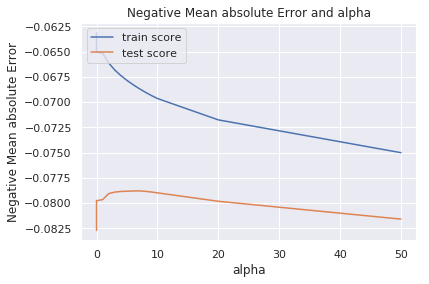

In [81]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean absolute Error')
plt.title("Negative Mean absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [82]:
alpha = 8
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 7.36071567e-02,  2.22689439e-02,  7.01252080e-02,  2.94920410e-02,
        4.92878360e-02,  3.14581272e-03,  7.42081303e-03, -1.10807981e-03,
        2.40869719e-02, -2.02740319e-02,  3.01552661e-03,  0.00000000e+00,
        2.67608731e-02, -2.38099158e-02, -1.85597275e-02, -9.25922961e-03,
        1.97684269e-02, -3.52862789e-02, -5.14751105e-03, -2.62707338e-02,
        2.15283377e-02,  4.25805093e-02, -5.54424496e-03,  1.02974463e-01,
       -3.67969413e-02, -1.95031104e-02, -4.89147336e-02, -6.54551600e-02,
       -2.96236702e-02, -3.01183660e-03,  1.39092311e-02, -2.34879195e-02,
        9.34082578e-03,  5.34861811e-02, -2.75157007e-02, -2.16581847e-03,
       -1.70701211e-02, -8.39948432e-03,  4.13978978e-02,  5.72973473e-02,
       -1.34836549e-02,  2.86121973e-02,  1.85368611e-02,  5.67847274e-02,
        9.01866024e-03,  1.68612557e-02, -3.50784766e-02,  1.97646835e-02,
       -3.71039191e-03,  2.08607987e-02,  2.38033902e-03,  3.65789437e-04,
        1.87281217e-02, -

In [108]:
# Lasso

lasso = Lasso()
# list of alphas to tune
alphas= [1, 0.1, 0.001, 0.0005]

#ridge model
model_lasso = LassoCV(alphas=alphas).fit(X_train,y_train)


#cv_ridge = [rmse_cv(Ridge(alpha=alpha)).mean() for alpha in alphas]
cv_lasso = rmse_cv(model_lasso).mean()
print(cv_lasso)

0.11597817044332726


In [109]:
print(model_lasso.coef_)

[ 7.07283211e-02  0.00000000e+00  5.44036068e-02  0.00000000e+00
  9.86281984e-03  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  6.62909363e-03 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  2.76995435e-02 -0.00000000e+00 -0.00000000e+00 -4.68506303e-03
  7.54386383e-03 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  3.52364701e-02  3.61982148e-02  0.00000000e+00  1.20640004e-01
 -1.33467141e-02 -0.00000000e+00 -2.92446099e-02 -3.76349796e-02
 -1.11512104e-02  7.67045930e-03  0.00000000e+00 -1.03540500e-02
  0.00000000e+00  5.24532519e-02 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  3.07018818e-02  4.69586766e-02
 -0.00000000e+00  0.00000000e+00  6.21982523e-05  4.30592174e-02
  0.00000000e+00  0.00000000e+00 -1.71773007e-02  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -5.36714259e-02
 -0.00000000e+00  0.00000

In [110]:
coeff = pd.Series(model_lasso.coef_,index = X_train.columns)
print('lasso picked:'+ str(sum(coeff !=0)))

lasso picked:83


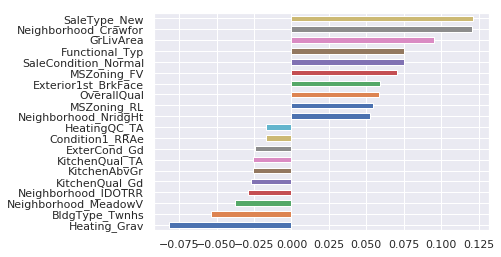

In [111]:
imp_coef = pd.concat([coeff.sort_values().head(10),coeff.sort_values().tail(10)])
imp_coef.plot(kind ='barh')


Lesson Learnt: the parameters in the output is very much dependent on the values of alpha chosen. with the list of values chosen earlier only 17 features were getting picked up and they were not making any sense either. 
lesson is -- choose aplha carefully

In [118]:
folds = 5
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0 ]}
lasso_cv = GridSearchCV(estimator = lasso,
                               param_grid = params,
                               cv= folds,
                               scoring = 'neg_mean_absolute_error',
                               return_train_score = True,
                               verbose = 1)

lasso_cv.fit(X_train,y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:   15.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [115]:
cv_results = pd.DataFrame(lasso_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.395248,0.188312,0.001992,0.000036,0.0001,{'alpha': 0.0001},-0.086802,-0.079484,-0.075501,-0.070564,-0.083548,-0.079180,0.005745,1,-0.063237,-0.065571,-0.066178,-0.068019,-0.064285,-0.065458,0.001637
1,0.600194,0.011908,0.002105,0.000183,0.001,{'alpha': 0.001},-0.087599,-0.082169,-0.075570,-0.074828,-0.088594,-0.081752,0.005785,2,-0.073471,-0.075193,-0.076467,-0.076839,-0.072936,-0.074981,0.001560
2,0.560792,0.004159,0.001935,0.000104,0.01,{'alpha': 0.01},-0.095559,-0.093552,-0.084314,-0.082269,-0.102234,-0.091586,0.007385,3,-0.087018,-0.088182,-0.089918,-0.090981,-0.086592,-0.088538,0.001679
3,0.553350,0.004701,0.001957,0.000107,0.05,{'alpha': 0.05},-0.115209,-0.101361,-0.096793,-0.098592,-0.119207,-0.106232,0.009166,4,-0.101127,-0.103371,-0.103197,-0.104864,-0.101140,-0.102740,0.001434
4,0.215156,0.014622,0.001996,0.000040,0.1,{'alpha': 0.1},-0.120699,-0.106636,-0.103670,-0.104345,-0.123931,-0.111856,0.008656,6,-0.106247,-0.109548,-0.109999,-0.110738,-0.105673,-0.108441,0.002069


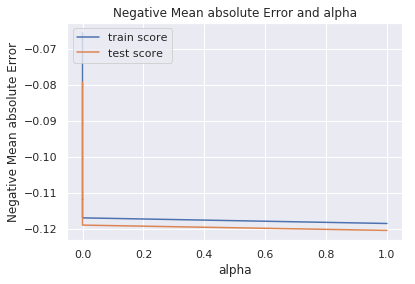

In [119]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean absolute Error')
plt.title("Negative Mean absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [120]:
alpha = 0.001

lasso = Lasso(alpha = alpha)
lasso.fit(X_train,y_train)
lasso.coef_

array([ 5.96354080e-02,  0.00000000e+00,  5.80219568e-02, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        1.71668856e-02, -0.00000000e+00, -0.00000000e+00, -3.23830603e-03,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        2.16161550e-02,  1.52916370e-02, -0.00000000e+00,  1.02788822e-01,
       -3.75713304e-03, -0.00000000e+00, -1.10481553e-03, -0.00000000e+00,
       -0.00000000e+00,  2.56117968e-03,  0.00000000e+00, -5.30873444e-03,
       -0.00000000e+00,  3.54520614e-02, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  2.73653393e-02,  8.37279156e-03,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  3.95422496e-02,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -

In [121]:
print(str(sum(lasso.coef_!= 0)))

65
